In [ ]:
#Statistical Thinking in Python (Part 2)
## 1. Parameter estimation by optimization
## 2. Bootstrap confidence intervals
## 3. Introduction to hypothesis testing
## 4. Hypothesis test examples
## 5. Putting it all together: a case study

## 1. Parameter estimation by optimization

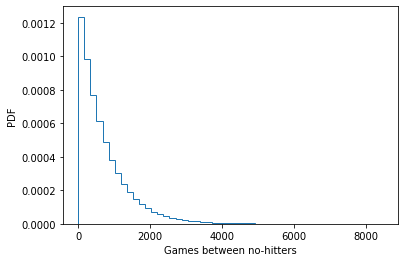

In [3]:
# Optimal parameters

# How often do we get no-hitters?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/mlb_nohitters.csv'
nohitter = pd.read_csv(filename)
nohitter_times = nohitter.game_number.diff()

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time, bins = 50, density = True, histtype = 'step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

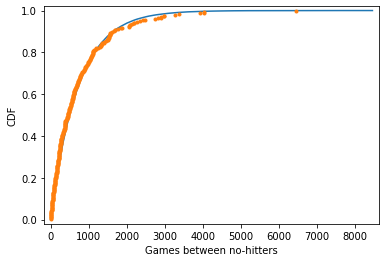

In [4]:
# Do the data follow our story?

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x,y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

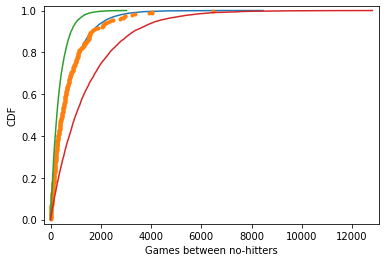

In [5]:
# How is this parameter optimal?

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

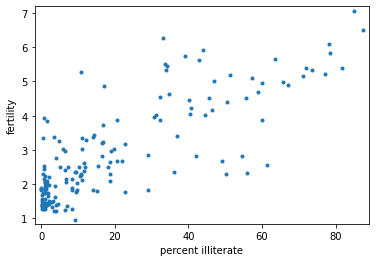

0.8041324026815344


In [7]:
# Linear regression by least squares

# EDA of literacy/fertility data

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/female_literacy_fertility.csv'
df = pd.read_csv(filename)
fertility = df['fertility']
illiteracy = 100.0 - df['female literacy']


def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.8880506106365567 children per woman


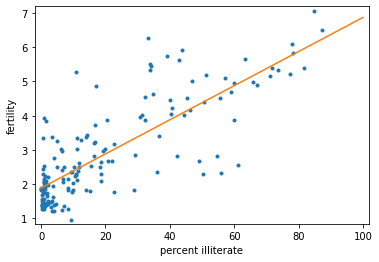

In [8]:
# Linear regression

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, deg = 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

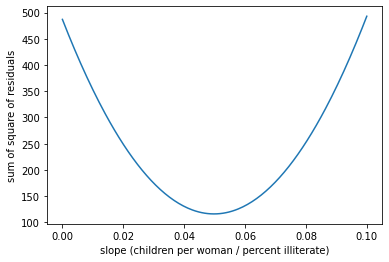

In [9]:
# How is it optimal?

# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals,rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

In [ ]:
# The importance of EDA: Anscombe's quartet

**The importance of EDA**

Why should exploratory data analysis be the first step in an analysis of data (after getting your data imported and cleaned, of course)?

**Possible Answers**

- [ ] You can be protected from misinterpretation of the type demonstrated by Anscombe's quartet.
- [ ] EDA provides a good starting point for planning the rest of your analysis.
- [ ] EDA is not really any more difficult than any of the subsequent analysis, so there is no excuse for not exploring the data.
- [x] All of these reasons!



0.5000909090909094 3.000090909090908


Text(0, 0.5, 'y')

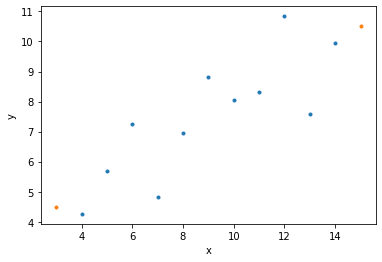

In [10]:
# Linear regression on appropriate Anscombe data

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/anscombe.csv'
df = pd.read_csv(filename, header = 1)
x = df.x
y = df.y

x1 = df.x
y1 = df.y
x2 = df['x.1']
y2 = df['y.1']
x3 = df['x.2']
y3 = df['y.2']
x4 = df['x.3']
y4 = df['y.3']
anscombe_x = [x1, x2, x3, x4] 
anscombe_y = [y1, y2, y3, y4]

# Perform linear regression: a, b
a, b = np.polyfit(x, y, deg = 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.plot(x_theor, y_theor, marker = '.', linestyle = 'none')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [11]:
# Linear regression on all Anscombe data

# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, deg = 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.0009090909090905
slope: 0.49972727272727313 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.0017272727272735


## 2. Bootstrap confidence intervals

In [ ]:
# Generating bootstrap replicates

**Getting the terminology down**

Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you often will read and hear other data scientists using different terminology for bootstrap samples and replicates. This is even more reason why we need everything to be clear and consistent for this course. So, before going forward discussing bootstrapping, let's get our terminology down. 

If we have a data set with n repeated measurements, a bootstrap sample is an array of length n that was drawn from the original data with replacement. What is a bootstrap replicate?

**Possible Answers**

- [ ] Just another name for a bootstrap sample.
- [x] A single value of a statistic computed from a bootstrap sample.
- [ ] An actual repeat of the measurements.


**Bootstrapping by hand**

To help you gain intuition about how bootstrapping works, imagine you have a data set that has only three points, [-1, 0, 1]. How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1] are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to jot down the samples on a piece of paper.

(These are too few data to get meaningful results from bootstrap procedures, but this example is useful for intuition.)

**Possible Answers**

- [ ] There are 3 unique samples, and the maximum mean is 0.
- [ ] There are 10 unique samples, and the maximum mean is 0.
- [ ] There are 10 unique samples, and the maximum mean is 1.
- [ ] There are 27 unique samples, and the maximum mean is 0.
- [x] There are 27 unique samples, and the maximum mean is 1.

Correct! There are 27 total bootstrap samples, and one of them, [1,1,1] has a mean of 1. Conversely, 7 of them have a mean of zero.

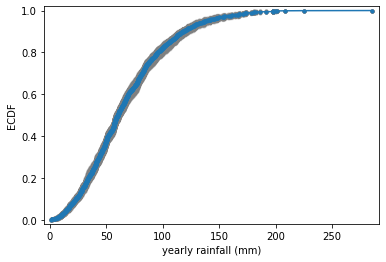

In [12]:
# Visualizing bootstrap samples

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/sheffield_weather_station.csv'
weather = pd.read_csv(filename, sep = '\s+', header = 8)
rainfall = weather.rain
rain_june = weather[weather.mm == 6].rain
rain_november = weather[weather.mm == 11].rain

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker ='.', linestyle ='none',
                 color ='gray', alpha =0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker ='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [13]:
# Bootstrap confidence intervals

# Generating many bootstrap replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.9488593574676786
0.9427722398781045


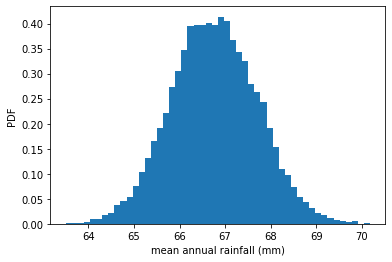

In [14]:
# Bootstrap replicates of the mean and the SEM

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

**Confidence intervals of rainfall data**

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

**Possible Answers**

- [ ] (765, 776) mm/year
- [x] (780, 821) mm/year
- [ ] (761, 817) mm/year
- [ ] (761, 841) mm/year

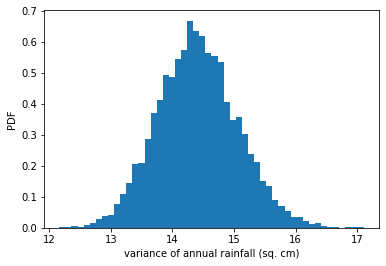

In [16]:
# Bootstrap replicates of other statistics

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates =  bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, density = True, bins = 50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [nan nan] games


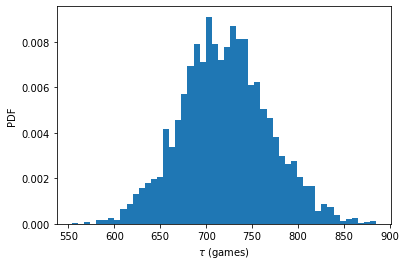

In [17]:
# Confidence interval on the rate of no-hitters

# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [18]:
# Pairs bootstrap

# A function to do pairs bootstrap

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[0.04393563 0.05546132]


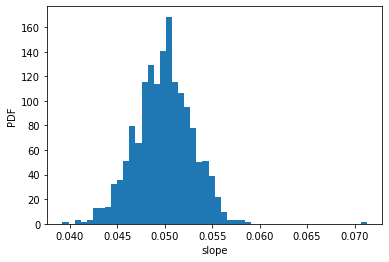

In [20]:
# Pairs bootstrap of literacy/fertility data

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

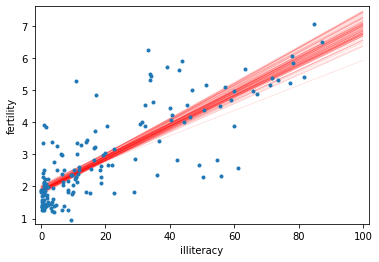

In [21]:
# Plotting bootstrap regressions

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker = '.', linestyle = 'none')
# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## 3. Introduction to hypothesis testing

In [22]:
# Formulating and simulating a hypothesis

# Generating a permutation sample

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

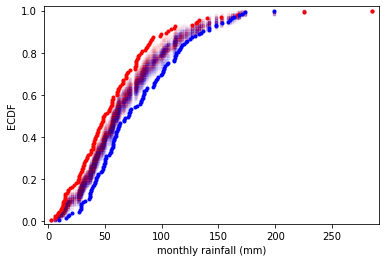

In [23]:
# Visualizing permutation sampling

for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [ ]:
# Test statistics and p-values

**Test statistics**

When performing hypothesis tests, your choice of test statistic should be:

**Possible Answers**

- [ ] something well-known, like the mean or median.
- [ ] be a parameter that can be estimated.
- [x] be pertinent to the question you are seeking to answer in your hypothesis test.


**What is a p-value?**

The p-value is generally a measure of:

Possible Answers

- [ ] the probability that the hypothesis you are testing is true.
- [ ] the probability of observing your data if the hypothesis you are testing is true.
- [x] the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

In [26]:
# Generating permutation replicates

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

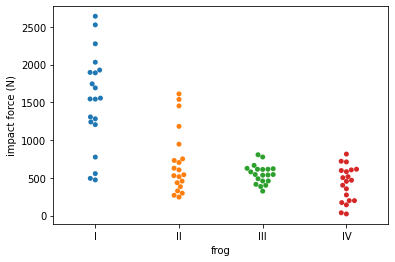

In [29]:
# Look before you leap: EDA before hypothesis testing

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/frog_tongue.csv'
df = pd.read_csv(filename, header = 14)
force_a = df[df['ID'] == 'I']['impact force (mN)']
force_b = df[df['ID'] == 'II']['impact force (mN)']
forces_concat = pd.concat([force_a, force_b])
df.sample(5)

# Make bee swarm plot
_ = sns.swarmplot(x = 'ID', y = 'impact force (mN)', data = df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

In [34]:
# Permutation test on frog data

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0


In [33]:
# Bootstrap hypothesis tests

# A one-sample bootstrap hypothesis test

# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  1.0


In [35]:
# A two-sample bootstrap hypothesis test for difference of means

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


## 4. Hypothesis test examples

In [ ]:
# A/B testing

In [36]:
# The vote for the Civil Rights Act in 1964

# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


**What is equivalent?**

You have experience matching stories to probability distributions. Similarly, you use the same procedure for two different A/B tests if their stories match. In the Civil Rights Act example you just did, you performed an A/B test on voting data, which has a Yes/No type of outcome for each subject (in that case, a voter). Which of the following situations involving testing by a web-based company has an equivalent set up for an A/B test as the one you just did with the Civil Rights Act of 1964?

**Possible Answers**

- [ ] You measure how much time each customer spends on your website before and after an advertising campaign.
- [x] You measure the number of people who click on an ad on your company's website before and after changing its color.
- [ ] You measure how many clicks each person has on your company's website before and after changing the header layout.

In [40]:
# A time-on-website analog

import pandas as pd

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/mlb_nohitters.csv'
df = pd.read_csv(filename)
# df = df[['date', 'game_number']].diff()
df.set_index('date', inplace = True)
df['diff'] = df.index
df = df['diff'].diff()
nht_dead = df[df.index < 19200101].values
nht_live = df[df.index > 19200101].values

# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


**What should you have done first?**

That was a nice hypothesis test you just did to check out whether the rule changes in 1920 changed the rate of no-hitters. But what should you have done with the data first?

**Possible Answers**

- [x] Performed EDA, perhaps plotting the ECDFs of inter-no-hitter times in the dead ball and live ball eras.
- [ ] Nothing. The hypothesis test was only a few lines of code.

Yes! Always a good idea to do first! I encourage you to go ahead and plot the ECDFs right now. You will see by eye that the null hypothesis that the distributions are the same is almost certainly not true.

In [ ]:
# Test of correlation

**Simulating a null hypothesis concerning correlation**

The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, which is the best way to do it?

**Possible Answers**

- [ ] Choose 162 random numbers to represent the illiteracy rate and 162 random numbers to represent the corresponding fertility rate.
- [ ] Do a pairs bootstrap: Sample pairs of observed data with replacement to generate a new set of (illiteracy, fertility) data.
- [ ] Do a bootstrap sampling in which you sample 162 illiteracy values with replacement and then 162 fertility values with replacement.
- [x] Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.
- [ ] Do a permutation test: Permute both the illiteracy and fertility values to generate a new set of (illiteracy, fertility data).

Yes, this exactly simulates the null hypothesis and does so more efficiently than the last option. It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled.

In [41]:
# Hypothesis test on Pearson correlation

# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates > r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


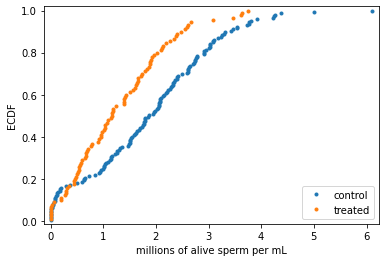

In [42]:
# Do neonicotinoid insecticides have unintended consequences?

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/bee_sperm.csv'
df = pd.read_csv(filename, header = 3)
control = df[df.Treatment == 'Control']['Alive Sperm Millions']
treated = df[df.Treatment == 'Pesticide']['Alive Sperm Millions']
df.sample(5)

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

In [43]:
# Bootstrap hypothesis test on bee sperm counts

# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


## 5. Putting it all together: a case study

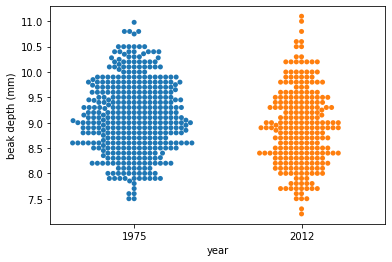

In [45]:
# Finch beaks and the need for statistics

# EDA of beak depths of Darwin's finches

finch_beaks_1975_url = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/finch_beaks_1975.csv'
finch_beaks_2012_url = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/finch_beaks_2012.csv'

df1 = pd.read_csv(finch_beaks_1975_url)
df1['Year'] = 1975
df2 = pd.read_csv(finch_beaks_2012_url)
df2['Year'] = 2012
df2.columns = df1.columns
df = pd.concat([df1, df2], ignore_index = True)
bd_1975 = df[(df.Year == 1975) & (df.species == 'scandens')]['Beak depth, mm'].values
bl_1975 = df[(df.Year == 1975) & (df.species == 'scandens')]['Beak length, mm'].values
bd_2012 = df[(df.Year == 2012) & (df.species == 'scandens')]['Beak depth, mm'].values
bl_2012 = df[(df.Year == 2012) & (df.species == 'scandens')]['Beak length, mm'].values

# Create bee swarm plot
_ = sns.swarmplot(x = 'Year', y = 'Beak depth, mm', data = df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

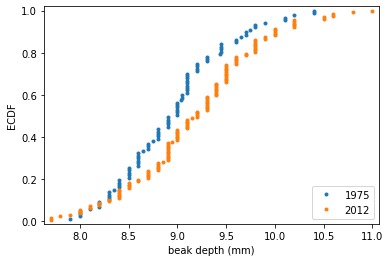

In [46]:
# ECDFs of beak depths

# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [47]:
# Parameter estimates of beak depths

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06088829 0.38844147] mm


In [48]:
# Hypothesis test: Are beaks deeper in 2012?

# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975 

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0026


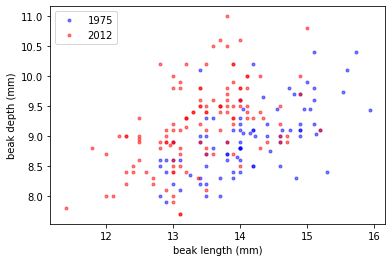

In [49]:
# Variation in beak shapes

# EDA of beak length and depth

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color = 'blue', alpha = 0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color = 'red', alpha = 0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [50]:
# Linear regressions

# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, deg = 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, deg = 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975,1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012,1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.32823001 0.58613793]
1975: intercept = 2.3908752365842263 conf int = [0.69737099 4.32443801]
2012: slope = 0.462630358835313 conf int = [0.34466197 0.5922237 ]
2012: intercept = 2.9772474982360198 conf int = [1.23235595 4.54471821]


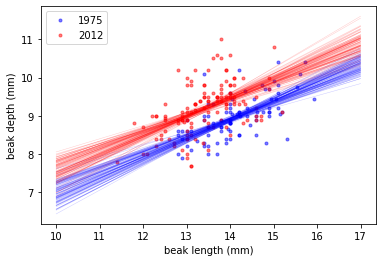

In [51]:
# Displaying the linear regression results

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

In [52]:
# Beak length to depth ratio

# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55641029 1.60089682]
2012: mean ratio = 1.4658342276847767 conf int = [1.44382914 1.48769326]


**How different is the ratio?**

In the previous exercise, you computed the mean beak length to depth ratio with 99% confidence intervals for 1975 and for 2012. The results of that calculation are shown graphically in the plot accompanying this problem. In addition to these results, what would you say about the ratio of beak length to depth?

![](https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/how_different_is_the_ratio.jpg)

**Possible Answers**

- [x] The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.
- [ ] It is impossible to say if this is a real effect or just due to noise without computing a p-value. Let me compute the p-value and get back to you.

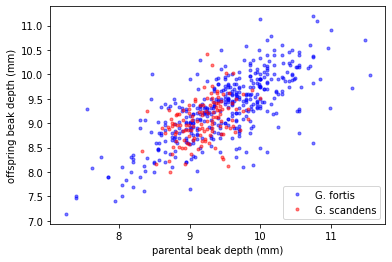

In [53]:
# Calculation of heritability

# EDA of heritability

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/fortis_beak_depth_heredity.csv'
df1 = pd.read_csv(filename)

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/scandens_beak_depth_heredity.csv'
df2 = pd.read_csv(filename)

bd_parent_fortis = df1[['Male BD', 'Female BD']].apply(np.mean, axis = 1).values
bd_offspring_fortis = df1['Mid-offspr'].values
bd_parent_scandens = df2.mid_parent.values
bd_offspring_scandens = df2.mid_offspring.values

# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

In [54]:
# Correlation of offspring and parental data

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [55]:
# Pearson correlation of offspring and parental data

# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.4117063629401258 [0.26979109 0.54018749]
G. fortis: 0.7283412395518487 [0.6716585  0.78012436]


In [56]:
# Measuring heritability

def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,
                                     bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,
                                   bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.3582478  0.73784249]
G. fortis: 0.7229051911438159 [0.64274571 0.79496695]


In [57]:
# Is beak depth heritable at all in G. scandens?

# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0
